# 2024 Brazillian Municipal Elections: Which Political Spectrum Was Victorious?  

Electoral behavior is a complex phenomenon influenced by a multitude of social, economic, cultural, and political factors. With advances in data analysis technologies, it has become possible to explore election dynamics more deeply and visually compellingly over time. This is a visualization of the 2024 elections, demonstrating through maps which regions elected mayors from a specific political spectrum.

# 1. Data Collection and Processing  

The data used is available in the [Superior Electoral Court (TSE) open data repository](https://dadosabertos.tse.jus.br/). Since the TSE does not offer API connection, CSV files will be used. To identify the ideology (political spectrum) of each party, a listing was developed based on Bolognesi, Ribeiro, and Codato (2023), taking as an example the list created by @kterra. Lastly, [*shapefiles*](https://en.wikipedia.org/wiki/Shapefile) for Brazilian municipalities were collected from the Brazilian Institute of Geography and Statistics (IBGE) website, in the [territorial mesh repository](https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html).

## Project Structure

```markdown
├── .data                 # Conjunto de dados brutos e tratados
|-- .shapefiles           # Conjunto de dados geográficos      
├── reports               # Relatórios gerados e documentações analíticas  
├── requirements.txt      # Bibliotecas e dependências do projeto  
└── README.md             # Documentação principal 
```

In [1]:
# Necessary libraries

import os
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from pprint import pprint

In [13]:
# Creation of the Table with Brazilian Political Parties, Their Respective Political Spectrum, and Numbers

partidos = np.array([
    ['PT', 'Left', 13],
    ['PSDB', 'Right', 45],
    ['UNIÃO', 'Right', 44],
    ['MDB', 'Center', 15],
    ['PP', 'Right', 11],
    ['PSD', 'Right', 55],
    ['PL', 'Right', 22],
    ['PSB', 'Left', 40],
    ['PDT', 'Left', 12],
    ['Solidariedade', 'Center', 77],
    ['Republicanos', 'Right', 10],
    ['PSOL', 'Left', 50],
    ['PCdoB', 'Left', 65],
    ['Rede', 'Center', 18],
    ['PV', 'Center', 43],
    ['Cidadania', 'Center', 23],
    ['PODE', 'Right', 19],
    ['DC', 'Right', 27],
    ['PCB', 'Left', 21],
    ['MOBILIZA', 'Right', 33],
    ['PRTB', 'Right', 28],
    ['PMB', 'Right', 35],
    ['UP', 'Left', 80],
    ['PRD', 'Right', 25],
    ['PSTU', 'Left', 16],
    ['PCO', 'Left', 29],
    ['AGIR', 'Left', 36],
    ['NOVO', 'Right', 30],
    ['AVANTE', 'Left', 70]
])

partidos_brasil = pd.DataFrame(partidos, columns=['Partido', 'Espectro', 'Número'])




In [14]:
partidos_brasil = partidos_brasil.sort_values(by='Número', ascending=True) # Ordenação dos partidos por número

This script creates a DataFrame containing Brazilian political parties, their respective political spectrums, and numbers.  
It then sorts the DataFrame by the party numbers in ascending order and converts the 'Spectrum' column to a categorical type with a specific order.

### Variables:
- `partidos (np.ndarray)`: A numpy array containing political parties, their spectrums, and numbers.  
- `partidos_brasil (pd.DataFrame)`: A DataFrame created from the 'partidos' array with the columns 'Party', 'Spectrum', and 'Number.'  
- `espec_type (pd.CategoricalDtype)`: A categorical data type for the 'Spectrum' column with a specific order.  

### Steps:
1. Create a numpy array 'partidos' with political parties, their spectrums, and numbers.  
2. Convert the 'partidos' array into a DataFrame called 'partidos_brasil.'  
3. Sort the 'partidos_brasil' DataFrame by the 'Number' column in ascending order.  
4. Define a categorical data type 'espec_type' for the 'Spectrum' column with a specific order.  
5. Convert the 'Spectrum' column in 'partidos_brasil' to the 'espec_type' categorical data type.  
6. Print the sorted and updated 'partidos_brasil' DataFrame. 

In [15]:
# Made a categorical type for the political spectrum of the parties
espec_type = pd.CategoricalDtype(categories=['Right', 'Center', 'Left'], ordered=True)

partidos_brasil['Espectro'] = partidos_brasil['Espectro'].astype(espec_type)

print(partidos_brasil)

          Partido Espectro Número
10   Republicanos    Right     10
4              PP    Right     11
8             PDT     Left     12
0              PT     Left     13
3             MDB   Center     15
24           PSTU     Left     16
13           Rede   Center     18
16           PODE    Right     19
18            PCB     Left     21
6              PL    Right     22
15      Cidadania   Center     23
23            PRD    Right     25
17             DC    Right     27
20           PRTB    Right     28
25            PCO     Left     29
27           NOVO    Right     30
19       MOBILIZA    Right     33
21            PMB    Right     35
26           AGIR     Left     36
7             PSB     Left     40
14             PV   Center     43
2           UNIÃO    Right     44
1            PSDB    Right     45
11           PSOL     Left     50
5             PSD    Right     55
12          PCdoB     Left     65
28         AVANTE     Left     70
9   Solidariedade   Center     77
22            

### Detailed Explanation:

1. `pd.CategoricalDtype:`

This is a pandas class that defines a custom categorical data type. Categorical data in pandas is useful for efficiently representing qualitative (categorical) variables.

#### Arguments of `pd.CategoricalDtype`:

- `categories`: A list of categories that the type should include. In the example, they are `['Right', 'Center', 'Left']`.  

- `ordered`: A boolean indicating whether the categories have a logical order (for instance, 'Right' is greater than 'Center,' which is greater than 'Left'). In this example, `ordered=True` defines this order.

#### What does the line do?

`espec_type` is a variable that stores this categorical type configuration.

It indicates that any pandas column or series with this type should:  
- Include only the categories `['Right', 'Center', 'Left']`.  
- Treat these categories as having a logical order: `'Right' < 'Center' < 'Left'`.

In [16]:
partidos_brasil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 10 to 22
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Partido   29 non-null     object  
 1   Espectro  29 non-null     category
 2   Número    29 non-null     object  
dtypes: category(1), object(2)
memory usage: 857.0+ bytes


Data files can be download at [Google Drive](https://drive.google.com/drive/folders/1GLH2YuCGg7jm1dwyyiRRhPCHmvkF7IQP?usp=drive_link)

In [17]:
# File variables
BR_Municipíos_2023 = 'path/to/BR_Municipíos_2023'  # Define the path to BR_Municipíos_2023
arquivo_resultado_2024 = os.path.join('./.data/votacao_candidato_munzona_2024.zip')
arquivo_resultado_2020 = os.path.join('./.data/votacao_candidato_munzona_2020.zip')
arquivo_resultado_2016 = os.path.join('./.data/votacao_candidato_munzona_2016.zip')
arquivo_BR_mun_shapefile = os.path.join("shapefiles", "BR_Municipios_2023.shp")

In [18]:
print(os.path.exists(arquivo_BR_mun_shapefile)) # Check if the shapefile exists

True


In [19]:
# Change the backend of the plotting library to plotly
pd.options.plotting.backend = 'plotly'

In [9]:
# Global variables for the analysis
local = 'BRASIL' # Place of interest, being BRASIL or a specific state
cargo = "Prefeito"  # Position of interest, being Prefeito or Vereador

In [10]:
with ZipFile(arquivo_resultado_2024) as z:
    with z.open(f'votacao_candidato_munzona_2024_{local}.csv') as f:
        resultado_2024 = pd.read_csv(f, sep=';', encoding='latin1', decimal=',')


with ZipFile(arquivo_resultado_2020) as z:
    with z.open(f'votacao_candidato_munzona_2020_{local}.csv') as f:
        resultado_2020 = pd.read_csv(f, sep=';', encoding='latin1', decimal=',')

with ZipFile(arquivo_resultado_2016) as z:
    with z.open(f'votacao_candidato_munzona_2016_{local}.csv') as f:
        resultado_2016 = pd.read_csv(f, sep=';', encoding='latin1', decimal=',')

resultado_2024.info()
resultado_2020.info()
resultado_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713527 entries, 0 to 713526
Data columns (total 50 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   DT_GERACAO                 713527 non-null  object
 1   HH_GERACAO                 713527 non-null  object
 2   ANO_ELEICAO                713527 non-null  int64 
 3   CD_TIPO_ELEICAO            713527 non-null  int64 
 4   NM_TIPO_ELEICAO            713527 non-null  object
 5   NR_TURNO                   713527 non-null  int64 
 6   CD_ELEICAO                 713527 non-null  int64 
 7   DS_ELEICAO                 713527 non-null  object
 8   DT_ELEICAO                 713527 non-null  object
 9   TP_ABRANGENCIA             713527 non-null  object
 10  SG_UF                      713527 non-null  object
 11  SG_UE                      713527 non-null  int64 
 12  NM_UE                      713527 non-null  object
 13  CD_MUNICIPIO               713527 non-null  

This script reads electoral data from CSV files contained within ZIP archives for the years 2024, 2020, and 2016. The data is loaded into pandas DataFrames, and basic information about each DataFrame is printed.

**Variables**:  
    `arquivo_resultado_2024` (str): Path to the ZIP file containing the 2024 election results.  
    `arquivo_resultado_2020` (str): Path to the ZIP file containing the 2020 election results.  
    `arquivo_resultado_2016` (str): Path to the ZIP file containing the 2016 election results.  
    `local` (str): A variable used to specify the location in the file name.  
    `resultado_2024` (DataFrame): DataFrame containing the 2024 election results.  
    `resultado_2020` (DataFrame): DataFrame containing the 2020 election results.  
    `resultado_2016` (DataFrame): DataFrame containing the 2016 election results.  

**Notes**:  
    - The CSV files are expected to be encoded in 'latin1' and use ';' as the delimiter and ',' as the decimal point.  
    - The script prints the structure and summary information of each DataFrame using the `info()` method.

That's we needs to check for the existence of a shapefile and attempt to load it using GeoPandas.

If the specified shapefile exists, the function attempts to load it into a GeoDataFrame.  
If not, it prints a message indicating the file was not found.

**Variables**  
`BR_mun_shapefile_path` (str): Path to the shapefile.

**Dependencies**  
- `os`: Module for operating system interaction  
- `geopandas` (gpd): Library for geospatial data processing  

**Exceptions**  
`Exception`: Catches any errors during shapefile loading and prints an error message.

**Output**  
- If successful: Prints the first rows of the GeoDataFrame  
- If unsuccessful: Prints an error message or file not found notification  

Key technical terms preserved:
- Shapefile (geospatial vector data format)
- GeoPandas (Python library)
- GeoDataFrame (geospatial dataframe structure)

In [11]:
# Check if shapefile exists
if os.path.exists(arquivo_BR_mun_shapefile):
    try:
        # Carregar o shapefile
        geo_df = gpd.read_file(arquivo_BR_mun_shapefile)
        print(geo_df.head())
    except Exception as e:
        print(f"Erro ao carregar o shapefile: {e}")
else:
    print(f"Arquivo não encontrado: {arquivo_BR_mun_shapefile}")

    CD_MUN                 NM_MUN  CD_RGI     NM_RGI CD_RGINT     NM_RGINT  \
0  1100015  Alta Floresta D'Oeste  110005     Cacoal     1102    Ji-Paraná   
1  1100023              Ariquemes  110002  Ariquemes     1101  Porto Velho   
2  1100031                 Cabixi  110006    Vilhena     1102    Ji-Paraná   
3  1100049                 Cacoal  110005     Cacoal     1102    Ji-Paraná   
4  1100056             Cerejeiras  110006    Vilhena     1102    Ji-Paraná   

  CD_UF     NM_UF CD_REGIAO NM_REGIAO CD_CONCURB NM_CONCURB  AREA_KM2  \
0    11  Rondônia         1     Norte       None       None  7067.127   
1    11  Rondônia         1     Norte       None       None  4426.143   
2    11  Rondônia         1     Norte       None       None  1314.352   
3    11  Rondônia         1     Norte       None       None  3793.000   
4    11  Rondônia         1     Norte       None       None  2783.297   

                                            geometry  
0  POLYGON ((-61.93075 -11.97349, -61

In [12]:
print(geo_df.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CD_MUN      5572 non-null   object  
 1   NM_MUN      5572 non-null   object  
 2   CD_RGI      5570 non-null   object  
 3   NM_RGI      5570 non-null   object  
 4   CD_RGINT    5570 non-null   object  
 5   NM_RGINT    5570 non-null   object  
 6   CD_UF       5570 non-null   object  
 7   NM_UF       5570 non-null   object  
 8   CD_REGIAO   5570 non-null   object  
 9   NM_REGIAO   5570 non-null   object  
 10  CD_CONCURB  660 non-null    object  
 11  NM_CONCURB  660 non-null    object  
 12  AREA_KM2    5572 non-null   float64 
 13  geometry    5572 non-null   geometry
dtypes: float64(1), geometry(1), object(12)
memory usage: 609.6+ KB
None


In [20]:
# Filtering the shapefile by the place of interest
if local != 'BRASIL':
    geo_df = geo_df[geo_df['NM_UF'] == local]

# Converte a coluna 'NM_MUN' para letras maiúsculas
geo_df['NM_MUN'] = geo_df['NM_MUN'].str.upper()

Filters the DataFrame `geo_df` based on the value of `local` and converts the 'NM_MUN' column to uppercase. If `local` is not 'BRASIL', the DataFrame `geo_df` is filtered to include only rows where the 'NM_UF' column matches the value of `local`. Then, the 'NM_MUN' column of `geo_df` is converted to uppercase.

Parameters:
    `geo_df (pd.DataFrame)`: The DataFrame containing geographical data.
    `local (str)`: The location filter. If not 'BRASIL', the DataFrame is filtered by this value.

Returns:
None: The function modifies `geo_df` in place.

In [21]:
# Check if the column 'NR_PARTIDO' is in the same format as the column 'Número' in the results

print(resultado_2016.info())
print(resultado_2020.info())
print(resultado_2024.info())
print(partidos_brasil.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940022 entries, 0 to 940021
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   DT_GERACAO                940022 non-null  object
 1   HH_GERACAO                940022 non-null  object
 2   ANO_ELEICAO               940022 non-null  int64 
 3   CD_TIPO_ELEICAO           940022 non-null  int64 
 4   NM_TIPO_ELEICAO           940022 non-null  object
 5   NR_TURNO                  940022 non-null  int64 
 6   CD_ELEICAO                940022 non-null  int64 
 7   DS_ELEICAO                940022 non-null  object
 8   DT_ELEICAO                940022 non-null  object
 9   TP_ABRANGENCIA            940022 non-null  object
 10  SG_UF                     940022 non-null  object
 11  SG_UE                     940022 non-null  int64 
 12  NM_UE                     940022 non-null  object
 13  CD_MUNICIPIO              940022 non-null  int64 
 14  NM_M

In [28]:
def resumo_dataframe(df, colunas):
    print(f"\nResumo do DataFrame '{df.name}' ({df.shape[0]} linhas):")
    for coluna in colunas:
        if coluna in df.columns:
            print(f"Coluna: {coluna}")
            print(f"  - dtype: {df[coluna].dtype}")
        else:
            print(f"A coluna '{coluna}' não existe no DataFrame.")

# Adiciona o atributo 'name' aos DataFrames
resultado_2016.name = 'resultado_2016'
resultado_2020.name = 'resultado_2020'
resultado_2024.name = 'resultado_2024'
partidos_brasil.name = 'partidos_brasil'

# Verificação dos tipos de dados das colunas de interesse
colunas_interesse = ['NR_PARTIDO', 'Número']
dataframes = [resultado_2016, resultado_2020, resultado_2024, partidos_brasil]

for df in dataframes:
    resumo_dataframe(df, colunas_interesse)

# Verificação dos tipos de dados das colunas de interesse
colunas_interesse = ['NR_PARTIDO', 'Número']
dataframes = [resultado_2016, resultado_2020, resultado_2024, partidos_brasil]

for df in dataframes:
    resumo_dataframe(df, colunas_interesse)


Resumo do DataFrame 'resultado_2016' (940022 linhas):
Coluna: NR_PARTIDO
  - dtype: int64
A coluna 'Número' não existe no DataFrame.

Resumo do DataFrame 'resultado_2020' (983759 linhas):
Coluna: NR_PARTIDO
  - dtype: int64
A coluna 'Número' não existe no DataFrame.

Resumo do DataFrame 'resultado_2024' (713527 linhas):
Coluna: NR_PARTIDO
  - dtype: int64
A coluna 'Número' não existe no DataFrame.

Resumo do DataFrame 'partidos_brasil' (29 linhas):
A coluna 'NR_PARTIDO' não existe no DataFrame.
Coluna: Número
  - dtype: int64

Resumo do DataFrame 'resultado_2016' (940022 linhas):
Coluna: NR_PARTIDO
  - dtype: int64
A coluna 'Número' não existe no DataFrame.

Resumo do DataFrame 'resultado_2020' (983759 linhas):
Coluna: NR_PARTIDO
  - dtype: int64
A coluna 'Número' não existe no DataFrame.

Resumo do DataFrame 'resultado_2024' (713527 linhas):
Coluna: NR_PARTIDO
  - dtype: int64
A coluna 'Número' não existe no DataFrame.

Resumo do DataFrame 'partidos_brasil' (29 linhas):
A coluna 'NR_

In [22]:
# Change party number to integer
partidos_brasil['Número'] = partidos_brasil['Número'].astype(int)

print(partidos_brasil['Número'].dtype) # Check if the column is in the correct format

int64


## 2. Analysis of Election Results by Political Spectrum

After obtaining the data, an analysis of the data by political spectrum will be conducted. To do this, the election results will be related to the political spectrum of the party, with the total vote being those obtained by the mayoral candidates from each party.

In [29]:
# Merge the results with the parties espectrums

resultado_2016 = pd.merge(resultado_2016, partidos_brasil[['Número', 'Espectro']], left_on='NR_PARTIDO', right_on='Número')
resultado_2016.drop(columns=['NR_PARTIDO'], inplace=True)
print(resultado_2016.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760931 entries, 0 to 760930
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   DT_GERACAO                760931 non-null  object  
 1   HH_GERACAO                760931 non-null  object  
 2   ANO_ELEICAO               760931 non-null  int64   
 3   CD_TIPO_ELEICAO           760931 non-null  int64   
 4   NM_TIPO_ELEICAO           760931 non-null  object  
 5   NR_TURNO                  760931 non-null  int64   
 6   CD_ELEICAO                760931 non-null  int64   
 7   DS_ELEICAO                760931 non-null  object  
 8   DT_ELEICAO                760931 non-null  object  
 9   TP_ABRANGENCIA            760931 non-null  object  
 10  SG_UF                     760931 non-null  object  
 11  SG_UE                     760931 non-null  int64   
 12  NM_UE                     760931 non-null  object  
 13  CD_MUNICIPIO              760

In [30]:
resultado_2020 = pd.merge(resultado_2020, partidos_brasil[['Número', 'Espectro']], left_on='NR_PARTIDO', right_on='Número')
resultado_2020.drop(columns=['NR_PARTIDO'], inplace=True)
print(resultado_2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812417 entries, 0 to 812416
Data columns (total 45 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   DT_GERACAO                 812417 non-null  object  
 1   HH_GERACAO                 812417 non-null  object  
 2   ANO_ELEICAO                812417 non-null  int64   
 3   CD_TIPO_ELEICAO            812417 non-null  int64   
 4   NM_TIPO_ELEICAO            812417 non-null  object  
 5   NR_TURNO                   812417 non-null  int64   
 6   CD_ELEICAO                 812417 non-null  int64   
 7   DS_ELEICAO                 812417 non-null  object  
 8   DT_ELEICAO                 812417 non-null  object  
 9   TP_ABRANGENCIA_ELEICAO     812417 non-null  object  
 10  SG_UF                      812417 non-null  object  
 11  SG_UE                      812417 non-null  int64   
 12  NM_UE                      812417 non-null  object  
 13  CD_MUNICIPIO  

In [31]:
resultado_2024 = pd.merge(resultado_2024, partidos_brasil[['Número', 'Espectro']], left_on='NR_PARTIDO', right_on='Número')
resultado_2024.drop(columns=['NR_PARTIDO'], inplace=True)
print(resultado_2024.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676214 entries, 0 to 676213
Data columns (total 51 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   DT_GERACAO                 676214 non-null  object  
 1   HH_GERACAO                 676214 non-null  object  
 2   ANO_ELEICAO                676214 non-null  int64   
 3   CD_TIPO_ELEICAO            676214 non-null  int64   
 4   NM_TIPO_ELEICAO            676214 non-null  object  
 5   NR_TURNO                   676214 non-null  int64   
 6   CD_ELEICAO                 676214 non-null  int64   
 7   DS_ELEICAO                 676214 non-null  object  
 8   DT_ELEICAO                 676214 non-null  object  
 9   TP_ABRANGENCIA             676214 non-null  object  
 10  SG_UF                      676214 non-null  object  
 11  SG_UE                      676214 non-null  int64   
 12  NM_UE                      676214 non-null  object  
 13  CD_MUNICIPIO  

This script processes electoral data to create a DataFrame with valid votes by political spectrum and party for the first round of the 2024 elections. It then identifies the winning political spectrum in each municipality.

Steps:
1. Filter the `resultado_2024` DataFrame to include only rows where:
    - The position (`DS_CARGO`) matches the specified `cargo`.
    - The election round (`NR_TURNO`) is 1.
    - The candidate's status (`DS_SIT_TOT_TURNO`) is 'ELEITO'.
2. Group the filtered data by municipality code (`CD_MUNICIPIO`), political spectrum (`Espectro`), party acronym (`SG_PARTIDO`), and candidate number (`Número`).
3. Aggregate the grouped data to get the first occurrence of municipality name (`NM_MUNICIPIO`) and state acronym (`SG_UF`), and sum the valid nominal votes (`QT_VOTOS_NOMINAIS_VALIDOS`).
4. Reset the index of the resulting DataFrame.
5. Identify the winning political spectrum in each municipality by selecting the row with the maximum valid nominal votes (`QT_VOTOS_NOMINAIS_VALIDOS`) for each municipality.
6. Reset the index of the resulting DataFrame to get the final DataFrame `espectro_vencedor_2024_turno1`.

Returns:
     DataFrame: A DataFrame containing the winning political spectrum in each municipality for the first round of the 2024 elections.

In [32]:
# Creating a DataFrame with valid votes by political spectrum and party for the first round

votos_espectro_2024_turno1 = resultado_2024[
    (resultado_2024['DS_CARGO'] == cargo) &
    (resultado_2024['NR_TURNO'] == 1) &
    (resultado_2024['DS_SIT_TOT_TURNO'] == 'ELEITO')
].groupby(
    ['CD_MUNICIPIO', 'Espectro', 'SG_PARTIDO', 'Número'], 
    observed=True
).agg({
    'NM_MUNICIPIO': 'first', 
    'SG_UF': 'first', 
    'QT_VOTOS_NOMINAIS_VALIDOS': 'sum'
}).reset_index()

espectro_vencedor_2024_turno1 = votos_espectro_2024_turno1.loc[votos_espectro_2024_turno1.groupby(['CD_MUNICIPIO'])['QT_VOTOS_NOMINAIS_VALIDOS'].idxmax()].reset_index(drop=True)

espectro_vencedor_2024_turno1

CD_MUNICIPIO Espectro    SG_PARTIDO  Número           NM_MUNICIPIO  \
0               19    Right            PP      11          GUAJARÁ-MIRIM   
1               51    Right            PL      22              JI-PARANÁ   
2               78    Right         UNIÃO      44              ARIQUEMES   
3               94    Right           PSD      55                 CACOAL   
4              159   Center           MDB      15                   JARU   
...            ...      ...           ...     ...                    ...   
5351         98990    Right            PL      22              VILA RICA   
5352         99015    Right         UNIÃO      44               COMODORO   
5353         99031    Right  REPUBLICANOS      10  FIGUEIRÓPOLIS D OESTE   
5354         99058    Right          NOVO      30      GUARANTÃ DO NORTE   
5355         99074    Right           PRD      25               INDIAVAÍ   

     SG_UF  QT_VOTOS_NOMINAIS_VALIDOS  
0       RO                       9099  
1       RO                      43371  
2       RO                      23816  
3       RO                      40270  
4       RO                      16342  
...    ...                        ...  
5351    MT                       5238  
5352    MT                       8101  
5353    MT                       1209  
5354    MT                       7687  
5355    MT                       1461  

[5356 rows x 7 columns]

1. **Data Filtering**:
   - We select only the records corresponding to the political position of interest (`DS_CARGO == cargo`), the 1st round of the election (`NR_TURNO == 1`), and with elected status (`DS_SIT_TOTAL_TURNO`).

2. **Data Grouping**:
   - We group the records by municipality (`CD_MUNICIPIO`), political spectrum (`Espectro`), political party (`SG_PARTIDO`), and candidate number (`Número`).
   - During the grouping, we perform the following aggregations:
     - Retain the first municipality name (`NM_MUNICIPIO`) and state abbreviation (`SG_UF`).
     - Calculate the sum of valid nominal votes (`QT_VOTOS_NOMINAIS_VALIDOS`) in each group.

3. **Identification of the Winning Spectrum**:
   - After grouping, we determine the political spectrum with the highest number of valid votes in each municipality.
   - This is done using `groupby` by municipality and selecting the index of the highest valid vote count with `idxmax`.

4. **Formatting the Result**:
   - We reset the index of the resulting DataFrame to keep it clean and organized.
   - The final result contains information about the winning political spectrum in each municipality, including the party, candidate number, municipality name, state abbreviation, and total valid votes.

This code facilitates the analysis of election results by consolidating the most relevant data into a single DataFrame.


This script processes electoral data to create a DataFrame with valid votes by political spectrum and party for the first round of the 2024 elections. It then identifies the winning political spectrum in each municipality.

Steps:
1. Filter the `resultado_2024` DataFrame to include only rows where:
    - The position (`DS_CARGO`) matches the specified `cargo`.
    - The election round (`NR_TURNO`) is 2.
    - The candidate's status (`DS_SIT_TOT_TURNO`) is 'ELEITO'.
2. Group the filtered data by municipality code (`CD_MUNICIPIO`), political spectrum (`Espectro`), party acronym (`SG_PARTIDO`), and candidate number (`Número`).
3. Aggregate the grouped data to get the first occurrence of municipality name (`NM_MUNICIPIO`) and state acronym (`SG_UF`), and sum the valid nominal votes (`QT_VOTOS_NOMINAIS_VALIDOS`).
4. Reset the index of the resulting DataFrame.
5. Identify the winning political spectrum in each municipality by selecting the row with the maximum valid nominal votes (`QT_VOTOS_NOMINAIS_VALIDOS`) for each municipality.
6. Reset the index of the resulting DataFrame to get the final DataFrame `espectro_vencedor_2024_turno2`.

Returns:
     
DataFrame: A DataFrame containing the winning political spectrum in each municipality for the first round of the 2024 elections.

In [33]:
# Creating a DataFrame with valid votes by political spectrum and party for the second round

votos_espectro_2024_turno2 = resultado_2024[
    (resultado_2024['DS_CARGO'] == cargo) &
    (resultado_2024['NR_TURNO'] == 2) &
    (resultado_2024['DS_SIT_TOT_TURNO'] == 'ELEITO')
].groupby(
    ['CD_MUNICIPIO', 'Espectro', 'SG_PARTIDO', 'Número'], 
    observed=True
).agg({
    'NM_MUNICIPIO': 'first', 
    'SG_UF': 'first', 
    'QT_VOTOS_NOMINAIS_VALIDOS': 'sum'
}).reset_index()

espectro_vencedor_2024_turno2 = votos_espectro_2024_turno2.loc[votos_espectro_2024_turno2.groupby(['CD_MUNICIPIO'])['QT_VOTOS_NOMINAIS_VALIDOS'].idxmax()].reset_index(drop=True)

espectro_vencedor_2024_turno2

CD_MUNICIPIO Espectro    SG_PARTIDO  Número           NM_MUNICIPIO SG_UF  \
0           2550     Left        AVANTE      70                 MANAUS    AM   
1           4278   Center           MDB      15                  BELÉM    PA   
2           5355   Center           MDB      15               SANTARÉM    PA   
3           8036    Right            PP      11             IMPERATRIZ    MA   
4          13730    Right           PSD      55                CAUCAIA    CE   
5          13897     Left            PT      13              FORTALEZA    CE   
6          17612    Right         UNIÃO      44                  NATAL    RN   
7          19810    Right         UNIÃO      44         CAMPINA GRANDE    PB   
8          20516    Right            PP      11            JOÃO PESSOA    PB   
9          24910    Right           PSD      55                 OLINDA    PE   
10         25135    Right          PSDB      45               PAULISTA    PE   
11         31054    Right            PL      22                ARACAJU    SE   
12         34134     Left            PT      13               CAMAÇARI    BA   
13         41238    Right           PSD      55         BELO HORIZONTE    MG   
14         54011    Right           PSD      55                UBERABA    MG   
15         56995     Left           PDT      12                  SERRA    ES   
16         58653     Left           PDT      12                NITERÓI    RJ   
17         58777    Right            PP      11             PETRÓPOLIS    RJ   
18         62138    Right  REPUBLICANOS      10                BARUERI    SP   
19         63770   Center           MDB      15                DIADEMA    SP   
20         64254   Center           MDB      15                 FRANCA    SP   
21         64777    Right            PL      22              GUARULHOS    SP   
22         66893     Left            PT      13                   MAUÁ    SP   
23         68756    Right           PSD      55             PIRACICABA    SP   
24         69698    Right           PSD      55         RIBEIRÃO PRETO    SP   
25         70718    Right  REPUBLICANOS      10                 SANTOS    SP   
26         70971    Right            PL      22  SÃO JOSÉ DO RIO PRETO    SP   
27         70998    Right           PSD      55    SÃO JOSÉ DOS CAMPOS    SP   
28         71072   Center           MDB      15              SÃO PAULO    SP   
29         71498    Right  REPUBLICANOS      10                 SUMARÉ    SP   
30         71579    Right         UNIÃO      44        TABOÃO DA SERRA    SP   
31         71838    Right          NOVO      30                TAUBATÉ    SP   
32         75353    Right           PSD      55               CURITIBA    PR   
33         76678    Right           PSD      55               LONDRINA    PR   
34         77771    Right         UNIÃO      44           PONTA GROSSA    PR   
35         85898    Right            PL      22                 CANOAS    RS   
36         85995    Right          PSDB      45          CAXIAS DO SUL    RS   
37         87912     Left            PT      13                PELOTAS    RS   
38         88013   Center           MDB      15           PORTO ALEGRE    RS   
39         88412    Right          PSDB      45            SANTA MARIA    RS   
40         90514    Right            PP      11           CAMPO GRANDE    MS   
41         90670    Right            PL      22                 CUIABÁ    MT   
42         92215    Right            PL      22               ANÁPOLIS    GO   
43         92274   Center           MDB      15   APARECIDA DE GOIÂNIA    GO   
44         93734    Right         UNIÃO      44                GOIÂNIA    GO   

    QT_VOTOS_NOMINAIS_VALIDOS  
0                      576171  
1                      421485  
2                       92628  
3                       81942  
4                      109835  
5                      716133  
6                      222661  
7                      136191  
8                      258727  
9  

In [34]:
votos_espectro_2020_turno1 = resultado_2020[
    (resultado_2020['DS_CARGO'] == cargo) &
    (resultado_2020['NR_TURNO'] == 1) &
    (resultado_2020['DS_SIT_TOT_TURNO'] == 'ELEITO')
].groupby(
    ['CD_MUNICIPIO', 'Espectro', 'SG_PARTIDO', 'Número'], 
    observed=True
).agg({
    'NM_MUNICIPIO': 'first', 
    'SG_UF': 'first', 
    'QT_VOTOS_NOMINAIS_VALIDOS': 'sum'
}).reset_index()

espectro_vencedor_2020_turno1 = votos_espectro_2020_turno1.loc[votos_espectro_2020_turno1.groupby(['CD_MUNICIPIO'])['QT_VOTOS_NOMINAIS_VALIDOS'].idxmax()].reset_index(drop=True)

espectro_vencedor_2020_turno1


CD_MUNICIPIO Espectro    SG_PARTIDO  Número           NM_MUNICIPIO  \
0               19   Center           MDB      15          GUAJARÁ-MIRIM   
1               51   Center           MDB      15              JI-PARANÁ   
2               94    Right           PSD      55                 CACOAL   
3              132   Center            PV      43                VILHENA   
4              159    Right          PSDB      45                   JARU   
...            ...      ...           ...     ...                    ...   
4983         98990    Right            PL      22              VILA RICA   
4984         99015    Right          PODE      19               COMODORO   
4985         99031    Right  REPUBLICANOS      10  FIGUEIRÓPOLIS D OESTE   
4986         99058    Right           DEM      25      GUARANTÃ DO NORTE   
4987         99074    Right           DEM      25               INDIAVAÍ   

     SG_UF  QT_VOTOS_NOMINAIS_VALIDOS  
0       RO                       4575  
1       RO                      15699  
2       RO                      25791  
3       RO                      16714  
4       RO                      19357  
...    ...                        ...  
4983    MT                       5552  
4984    MT                       5795  
4985    MT                       1320  
4986    MT                       6739  
4987    MT                        865  

[4988 rows x 7 columns]

In [35]:
votos_espectro_2020_turno2 = resultado_2020[
    (resultado_2020['DS_CARGO'] == cargo) &
    (resultado_2020['NR_TURNO'] == 2) &
    (resultado_2020['DS_SIT_TOT_TURNO'] == 'ELEITO')
].groupby(
    ['CD_MUNICIPIO', 'Espectro', 'SG_PARTIDO', 'Número'], 
    observed=True
).agg({
    'NM_MUNICIPIO': 'first', 
    'SG_UF': 'first', 
    'QT_VOTOS_NOMINAIS_VALIDOS': 'sum'
}).reset_index()

espectro_vencedor_2020_turno2 = votos_espectro_2020_turno2.loc[votos_espectro_2020_turno2.groupby(['CD_MUNICIPIO'])['QT_VOTOS_NOMINAIS_VALIDOS'].idxmax()].reset_index(drop=True)

espectro_vencedor_2020_turno2


CD_MUNICIPIO Espectro SG_PARTIDO  Número  NM_MUNICIPIO SG_UF  \
0             35    Right       PSDB      45   PORTO VELHO    RO   
1            132    Right       PODE      19       VILHENA    RO   
2           1392    Right         PP      11    RIO BRANCO    AC   
3           2550     Left     AVANTE      70        MANAUS    AM   
4           3018   Center        MDB      15     BOA VISTA    RR   
..           ...      ...        ...     ...           ...   ...   
59         88013   Center        MDB      15  PORTO ALEGRE    RS   
60         88412    Right       PSDB      45   SANTA MARIA    RS   
61         90670   Center        MDB      15        CUIABÁ    MT   
62         92215    Right         PP      11      ANÁPOLIS    GO   
63         93734   Center        MDB      15       GOIÂNIA    GO   

    QT_VOTOS_NOMINAIS_VALIDOS  
0                      109992  
1                       30111  
2                      104746  
3                      466970  
4                      116792  
..                        ...  
59                     370550  
60                      71927  
61                     135871  
62                     101349  
63                     277497  

[64 rows x 7 columns]

An important detail regarding the 2016 results is that only the total nominal votes are available. Therefore, for analysis purposes, this total was considered as valid votes.

In [37]:
print(resultado_2016.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760931 entries, 0 to 760930
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   DT_GERACAO                760931 non-null  object  
 1   HH_GERACAO                760931 non-null  object  
 2   ANO_ELEICAO               760931 non-null  int64   
 3   CD_TIPO_ELEICAO           760931 non-null  int64   
 4   NM_TIPO_ELEICAO           760931 non-null  object  
 5   NR_TURNO                  760931 non-null  int64   
 6   CD_ELEICAO                760931 non-null  int64   
 7   DS_ELEICAO                760931 non-null  object  
 8   DT_ELEICAO                760931 non-null  object  
 9   TP_ABRANGENCIA            760931 non-null  object  
 10  SG_UF                     760931 non-null  object  
 11  SG_UE                     760931 non-null  int64   
 12  NM_UE                     760931 non-null  object  
 13  CD_MUNICIPIO              760

In [38]:
votos_espectro_2016_turno1 = resultado_2016[
    (resultado_2016['DS_CARGO'] == cargo) &
    (resultado_2016['NR_TURNO'] == 1) &
    (resultado_2016['DS_SIT_TOT_TURNO'] == 'ELEITO')
].groupby(
    ['CD_MUNICIPIO', 'Espectro', 'SG_PARTIDO', 'Número'], 
    observed=True
).agg({
    'NM_MUNICIPIO': 'first', 
    'SG_UF': 'first', 
    'QT_VOTOS_NOMINAIS': 'sum'
}).reset_index()

espectro_vencedor_2016_turno1 = votos_espectro_2016_turno1.loc[votos_espectro_2016_turno1.groupby(['CD_MUNICIPIO'])['QT_VOTOS_NOMINAIS'].idxmax()].reset_index(drop=True)

espectro_vencedor_2016_turno1

CD_MUNICIPIO Espectro SG_PARTIDO  Número           NM_MUNICIPIO SG_UF  \
0               19    Right        DEM      25          GUAJARÁ-MIRIM    RO   
1               51     Left        PSB      40              JI-PARANÁ    RO   
2               78   Center       PMDB      15              ARIQUEMES    RO   
3               94   Center       PMDB      15                 CACOAL    RO   
4              116     Left        PSB      40          PIMENTA BUENO    RO   
...            ...      ...        ...     ...                    ...   ...   
5021         98990    Right         PR      22              VILA RICA    MT   
5022         99015    Right        DEM      25               COMODORO    MT   
5023         99031    Right       PSDB      45  FIGUEIRÓPOLIS D OESTE    MT   
5024         99058    Right        PRB      10      GUARANTÃ DO NORTE    MT   
5025         99074    Right        PSD      55               INDIAVAÍ    MT   

      QT_VOTOS_NOMINAIS  
0                 10873  
1                 40613  
2                 26808  
3                 19715  
4                  8890  
...                 ...  
5021               4492  
5022               5487  
5023               1487  
5024               4881  
5025                914  

[5026 rows x 7 columns]

In [39]:
votos_espectro_2016_turno2 = resultado_2016[
    (resultado_2016['DS_CARGO'] == cargo) &
    (resultado_2016['NR_TURNO'] == 2) &
    (resultado_2016['DS_SIT_TOT_TURNO'] == 'ELEITO')
].groupby(
    ['CD_MUNICIPIO', 'Espectro', 'SG_PARTIDO', 'Número'], 
    observed=True
).agg({
    'NM_MUNICIPIO': 'first', 
    'SG_UF': 'first', 
    'QT_VOTOS_NOMINAIS': 'sum'
}).reset_index()

espectro_vencedor_2016_turno2 = votos_espectro_2016_turno2.loc[votos_espectro_2016_turno2.groupby(['CD_MUNICIPIO'])['QT_VOTOS_NOMINAIS'].idxmax()].reset_index(drop=True)

espectro_vencedor_2016_turno2

CD_MUNICIPIO Espectro SG_PARTIDO  Número             NM_MUNICIPIO SG_UF  \
0             35    Right       PSDB      45              PORTO VELHO    RO   
1           2550    Right       PSDB      45                   MANAUS    AM   
2           4278    Right       PSDB      45                    BELÉM    PA   
3           6050   Center       REDE      18                   MACAPÁ    AP   
4           9210     Left        PDT      12                 SÃO LUÍS    MA   
5          13730    Right        PMB      35                  CAUCAIA    CE   
6          13897     Left        PDT      12                FORTALEZA    CE   
7          23817    Right       PSDB      45                  CARUARU    PE   
8          24570    Right         PR      22  JABOATÃO DOS GUARARAPES    PE   
9          24910   Center         SD      77                   OLINDA    PE   
10         25313     Left        PSB      40                   RECIFE    PE   
11         27855    Right       PSDB      45                   MACEIÓ    AL   
12         31054     Left    PC do B      65                  ARACAJU    SE   
13         39659   Center       PMDB      15     VITÓRIA DA CONQUISTA    BA   
14         43710    Right       PSDB      45                 CONTAGEM    MG   
15         47333   Center       PMDB      15             JUIZ DE FORA    MG   
16         48658   Center        PPS      23            MONTES CLAROS    MG   
17         56251   Center        PPS      23                CARIACICA    ES   
18         56995   Center       REDE      18                    SERRA    ES   
19         57037    Right       PSDB      45               VILA VELHA    ES   
20         57053   Center        PPS      23                  VITÓRIA    ES   
21         58041   Center       PMDB      15             BELFORD ROXO    RJ   
22         58335   Center       PMDB      15          DUQUE DE CAXIAS    RJ   
23         58653   Center         PV      43                  NITERÓI    RJ   
24         58696    Right         PR      22              NOVA IGUAÇU    RJ   
25         58777   Center       PMDB      15               PETRÓPOLIS    RJ   
26         58971   Center        PPS      23              SÃO GONÇALO    RJ   
27         59250   Center         PV      43            VOLTA REDONDA    RJ   
28         60011    Right        PRB      10           RIO DE JANEIRO    RJ   
29         62197    Right        PSD      55                    BAURU    SP   
30         63770   Center         PV      43                  DIADEMA    SP   
31         64254    Right        DEM      25                   FRANCA    SP   
32         64750     Left        PSB      40                  GUARUJÁ    SP   
33         64777     Left        PSB      40                GUARULHOS    SP   
34         66192    Right       PSDB      45                  JUNDIAÍ    SP   
35         66893     Left        PSB      40                     MAUÁ    SP   
36         67890    Right        PTN      19                   OSASCO    SP   
37         69698    Right       PSDB      45           RIBEIRÃO PRETO    SP   
38         70572    Right       PSDB      45              SANTO ANDRÉ    SP   
39         70750    Right       PSDB      45    SÃO BERNARDO DO CAMPO    SP   
40         71455    Right        DEM      25                 SOROCABA    SP   
41         71510    Right         PR      22                   SUZANO    SP   
42         75353    Right        PMN      33                 CURITIBA    PR   
43         76910     Left        PDT      12                  MARINGÁ    PR   
44         77771   Center        PPS      23             PONTA GROSSA    PR   
45         80470    Right       PSDB      45                 BLUMENAU    SC   
46         81051   Center       PMDB      15            FLORIANÓPOLIS    SC   
47         81795   Center       PMDB      15                JOINVILLE    SC   
48         85995    Right        PRB      10            CAXIAS DO SUL    RS   
49         88013    Right       PSDB      45          

Concatenates dataframes containing political spectrum information for election winners from different rounds.

Each year's dataframe is created by combining data from first and second rounds of elections.
The concatenation is performed vertically (stacking), with reset index.

**Parameters**:

`espectro_vencedor_{YEAR}_turno1 : pandas.DataFrame`: DataFrame containing first round winners' political spectrum for specified year
`espectro_vencedor_{YEAR}_turno2 : pandas.DataFrame`: DataFrame containing second round winners' political spectrum for specified year

**Returns**:

`espectro_vencedor_{YEAR} : pandas.DataFrame`: Combined DataFrame with election winners' political spectrum for both rounds

In [51]:
espectro_vencedor_2016 = pd.concat([espectro_vencedor_2016_turno1, espectro_vencedor_2016_turno2], ignore_index=True)
espectro_vencedor_2020 = pd.concat([espectro_vencedor_2020_turno1, espectro_vencedor_2020_turno2], ignore_index=True)
espectro_vencedor_2024 = pd.concat([espectro_vencedor_2024_turno1, espectro_vencedor_2024_turno2], ignore_index=True)

## 2.1. Merging IBGE and TSE data

Some municipalities have different spellings in the TSE compared to those registered in the IBGE, which can cause discrepancies when generating analysis data. Therefore, it is important to verify the spelling based on IBGE data first. For this, a JSON file with the names of Brazilian municipalities will be imported.

In [40]:
# URL path to the IBGE API
url = 'https://servicodados.ibge.gov.br/api/v1/localidades/municipios'

# Optional parameters
params = {
    'orderBy': 'nome' # Ordenar por nome do município
}

try:

    # Made the get request
    response = requests.get(url, params=params)

    # Checks if the request was successful
    if response.status_code == 200:
        # Extracting the JSON data
        mun_ibge = response.json()

        # Printing the JSON data
        pprint(mun_ibge)

        with open('municipios_ibge.json', 'w', encoding='utf-8') as f:
            json.dump(mun_ibge, f, ensure_ascii=False, indent=2)

    else:
        print(f"Erro na requisição: {response.status_code}")
        
except requests.exceptions.RequestException as e:
    print(f"Erro na conexão: {e}")

[{'id': 5200050,
  'microrregiao': {'id': 52010,
                   'mesorregiao': {'UF': {'id': 52,
                                          'nome': 'Goiás',
                                          'regiao': {'id': 5,
                                                     'nome': 'Centro-Oeste',
                                                     'sigla': 'CO'},
                                          'sigla': 'GO'},
                                   'id': 5203,
                                   'nome': 'Centro Goiano'},
                   'nome': 'Goiânia'},
  'nome': 'Abadia de Goiás',
  'regiao-imediata': {'id': 520001,
                      'nome': 'Goiânia',
                      'regiao-intermediaria': {'UF': {'id': 52,
                                                      'nome': 'Goiás',
                                                      'regiao': {'id': 5,
                                                                 'nome': 'Centro-Oeste',
                       

This script fetches data from the IBGE API for Brazilian municipalities, orders them by name, and saves the data in a JSON file.

Modules:
- `requests`: To make HTTP requests to the IBGE API.
- `json`: To handle JSON data.
- `pprint`: To print JSON data in a readable format.

Variables:
- url (str): The base URL of the IBGE API.
- params (dict): Optional parameters for the API request, in this case, ordering by municipality name.
- response (requests.Response): The response object from the API request.
- mun_ibge (list): The list of municipality data extracted from the API response.

Exceptions:
- `requests.exceptions.RequestException`: Handles any exceptions that occur during the API request.

Usage: Run the script to fetch municipality data from the IBGE API, print it, and save it to 'municipios_ibge.json'.

In [41]:
# Create a dataframe with the names of the municipalities and their respective UF

with open('municipios_ibge.json', 'r', encoding='utf-8') as f:
    mun_ibge = json.load(f)

municipios = pd.DataFrame([{
    'id': mun['id'],
    'mun': mun['nome'],
    'uf': mun['microrregiao']['mesorregiao']['UF']['sigla']
} for mun in mun_ibge])

municipios['mun'] = municipios['mun'].str.upper()

In [42]:
# Municipalities from TSE
mun_tse = resultado_2024.groupby(resultado_2024['CD_MUNICIPIO']).first().reset_index()[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'SG_UF']]
mun_tse


CD_MUNICIPIO           NM_MUNICIPIO SG_UF
0               19          GUAJARÁ-MIRIM    RO
1               35            PORTO VELHO    RO
2               51              JI-PARANÁ    RO
3               78              ARIQUEMES    RO
4               94                 CACOAL    RO
...            ...                    ...   ...
5564         98990              VILA RICA    MT
5565         99015               COMODORO    MT
5566         99031  FIGUEIRÓPOLIS D OESTE    MT
5567         99058      GUARANTÃ DO NORTE    MT
5568         99074               INDIAVAÍ    MT

[5569 rows x 3 columns]

There are different spellings for some municipalities when comparing IBGE and TSE data. Therefore, it is necessary to standardize them.

In [43]:
print(mun_tse.columns)

Index(['CD_MUNICIPIO', 'NM_MUNICIPIO', 'SG_UF'], dtype='object')


In [44]:
len(municipios), len(mun_tse)

(5570, 5569)

In [45]:
# Function for check if the names of the municipalities are the same

import unidecode

def padronizar_nome(nome):
    """
    Standardizes a name by removing extra whitespace, converting to lowercase,
    and removing accents and special characters.

    Args:
        nome (str): The name to be standardized.

    Returns:
        str: The standardized name.
    """
    nome = nome.strip()  # Remove espaços em branco extras
    nome = nome.lower()  # Converte para letras minúsculas
    nome = unidecode.unidecode(nome)  # Remove acentos e caracteres especiais
    return nome

# Aplicar a função de padronização aos nomes dos municípios
municipios['mun_padronizado'] = municipios['mun'].apply(padronizar_nome)
mun_tse['NM_MUNICIPIO_padronizado'] = mun_tse['NM_MUNICIPIO'].apply(padronizar_nome)

# Verificar se os municípios do df_28 estão no df_29
municipios['match'] = municipios['mun_padronizado'].isin(mun_tse['NM_MUNICIPIO_padronizado'])

# Exibir o resultado
print(municipios)

cidades_diferentes = municipios[municipios['match'] == False]


           id                  mun  uf      mun_padronizado  match
0     5200050      ABADIA DE GOIÁS  GO      abadia de goias   True
1     3100104  ABADIA DOS DOURADOS  MG  abadia dos dourados   True
2     5200100            ABADIÂNIA  GO            abadiania   True
3     3100203               ABAETÉ  MG               abaete   True
4     1500107           ABAETETUBA  PA           abaetetuba   True
...       ...                  ...  ..                  ...    ...
5565  2933604          XIQUE-XIQUE  BA          xique-xique   True
5566  2517407               ZABELÊ  PB               zabele   True
5567  3557154             ZACARIAS  SP             zacarias   True
5568  2114007              ZÉ DOCA  MA              ze doca   True
5569  4219853               ZORTÉA  SC               zortea   True

[5570 rows x 5 columns]


In [46]:
# Dictionary with the names of the municipalities to be updated

cidades_excluir = ['BRASILIA', 'FERNANDO DE NORONHA']

dicionario_tse = {
    'AÇU': 'ASSÚ',
    'ARÊS': 'AREZ',
    'CAMACAN': 'CAMACÃ',
    'JANUÁRIO CICCO': 'BOA SAÚDE',
    'OLHOS-D\'ÁGUA': 'OLHOS D\'ÁGUA',
}

# Update the names of the municipalities
for key, value in dicionario_tse.items():
	municipios.loc[municipios['mun'] == key.upper(), 'mun'] = value.upper()

municipios = municipios[~municipios['mun'].isin(cidades_excluir)]

In [47]:
# Merging the municipalities from IBGE with the TSE municipalities

municipios_final = pd.merge(municipios, mun_tse, left_on=['mun', 'uf'], right_on=['NM_MUNICIPIO', 'SG_UF'], how='inner')
municipios_final = municipios_final[['id', 'mun', 'uf', 'CD_MUNICIPIO']]
municipios_final

id                  mun  uf  CD_MUNICIPIO
0     5200050      ABADIA DE GOIÁS  GO         93360
1     3100104  ABADIA DOS DOURADOS  MG         40010
2     5200100            ABADIÂNIA  GO         92010
3     3100203               ABAETÉ  MG         40037
4     1500107           ABAETETUBA  PA          4014
...       ...                  ...  ..           ...
5502  2933604          XIQUE-XIQUE  BA         39713
5503  2517407               ZABELÊ  PB         19348
5504  3557154             ZACARIAS  SP         61921
5505  2114007              ZÉ DOCA  MA          9717
5506  4219853               ZORTÉA  SC         81825

[5507 rows x 4 columns]

## 2.2. Link the shapefile files with the TSE codes and the names of the municipalities

To organize the exact location of the municipalities in order to map the regions and the winning political spectrum.

In [48]:
# Merging the shapefile with the municipalities

# Verificação dos tipos de dados
print(geo_df.dtypes)

# Alteração do código do município no dataframe compilado do IBGE para object
municipios['id'] = municipios['id'].astype(str)

CD_MUN          object
NM_MUN          object
CD_RGI          object
NM_RGI          object
CD_RGINT        object
NM_RGINT        object
CD_UF           object
NM_UF           object
CD_REGIAO       object
NM_REGIAO       object
CD_CONCURB      object
NM_CONCURB      object
AREA_KM2       float64
geometry      geometry
dtype: object


In [49]:
merged_map = geo_df.merge(municipios, left_on='CD_MUN', right_on='id', how='inner')

merged_map

CD_MUN                 NM_MUN  CD_RGI                      NM_RGI  \
0     1100015  ALTA FLORESTA D'OESTE  110005                      Cacoal   
1     1100023              ARIQUEMES  110002                   Ariquemes   
2     1100031                 CABIXI  110006                     Vilhena   
3     1100049                 CACOAL  110005                      Cacoal   
4     1100056             CEREJEIRAS  110006                     Vilhena   
...       ...                    ...     ...                         ...   
5564  5222005             VIANÓPOLIS  520002                    Anápolis   
5565  5222054         VICENTINÓPOLIS  520009                 Piracanjuba   
5566  5222203               VILA BOA  520022             Flores de Goiás   
5567  5222302          VILA PROPÍCIO  520018  Ceres - Rialma - Goianésia   
5568  5300108               BRASÍLIA  530001            Distrito Federal   

     CD_RGINT                          NM_RGINT CD_UF             NM_UF  \
0        1102                         Ji-Paraná    11          Rondônia   
1        1101                       Porto Velho    11          Rondônia   
2        1102                         Ji-Paraná    11          Rondônia   
3        1102                         Ji-Paraná    11          Rondônia   
4        1102                         Ji-Paraná    11          Rondônia   
...       ...                               ...   ...               ...   
5564     5201                           Goiânia    52             Goiás   
5565     5202                         Itumbiara    52             Goiás   
5566     5206  Luziânia - Águas Lindas de Goiás    52             Goiás   
5567     5205                Porangatu - Uruaçu    52             Goiás   
5568     5301                  Distrito Federal    53  Distrito Federal   

     CD_REGIAO     NM_REGIAO CD_CONCURB   NM_CONCURB  AREA_KM2  \
0            1         Norte       None         None  7067.127   
1            1         Norte       None         None  4426.143   
2            1         Norte       None         None  1314.352   
3            1         Norte       None         None  3793.000   
4            1         Norte       None         None  2783.297   
...        ...           ...        ...          ...       ...   
5564         5  Centro-oeste       None         None   954.115   
5565         5  Centro-oeste       None         None   733.794   
5566         5  Centro-oeste       None         None  1052.593   
5567         5  Centro-oeste       None         None  2181.593   
5568         5  Centro-oeste    5300108  Brasília/DF  5760.783   

                                               geometry       id  \
0     POLYGON ((-61.93075 -11.97349, -61.93234 -11.9...  1100015   
1     POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...  1100023   
2     POLYGON ((-60.56035 -13.32206, -60.52518 -13.3...  1100031   
3     POLYGON ((-61.00075 -11.25298, -61.0008 -11.29...  1100049   
4     POLYGON ((-60.82068 -13.11944, -60.81773 -13.1...  1100056   
...                                                 ...      ...   
5564  POLYGON ((-48.31126 -16.84221, -48.3117 -16.84...  5222005   
5565  POLYGON ((-49.73613 -17.74427, -49.73624 -17.7...  5222054   
5566  POLYGON ((-47.0778 -15.06364, -47.07799 -15.06...  5222203   
5567  POLYGON ((-48.58713 -15.31847, -48.58714 -15.3...  5222302   
5568  POLYGON ((-48.01472 -16.04996, -48.01573 -16.0...  5300108   

                        mun  uf        mun_padronizado  match  
0     ALTA FLORESTA D'OESTE  RO  alta floresta d'oeste  False  
1                 ARIQUEMES  RO              ariquemes   True  
2                    CABIXI  RO                 cabixi   True  
3                    CACOAL  RO                 cacoal   True  
4                CEREJEIRAS  RO             cerejeiras   True  
...                     ...  ..                    ...    ...  
5564             VIANÓPOLIS  GO             vianopolis   True  
5565         VICENTINÓPOLIS  GO         vicentinopolis   True  
5566   

# 3. Creation of Maps with Election Results

Now maps will be developed with the election results to identify the winning spectrums in the regions of the country. We already have in the dataframes `espectro_vencedor_2016`, `espectro_vencedor_2020`, and `espectro_vencedor_2024` which parties and spectrums won the elections.

Let's merge the geographic data with the results.

In [52]:
# Merging municipalities by the TSE code

print(espectro_vencedor_2016.dtypes)
print(espectro_vencedor_2020.dtypes)
print(espectro_vencedor_2024.dtypes)
print(municipios_final.dtypes)

CD_MUNICIPIO            int64
Espectro             category
SG_PARTIDO             object
Número                  int64
NM_MUNICIPIO           object
SG_UF                  object
QT_VOTOS_NOMINAIS       int64
dtype: object
CD_MUNICIPIO                    int64
Espectro                     category
SG_PARTIDO                     object
Número                          int64
NM_MUNICIPIO                   object
SG_UF                          object
QT_VOTOS_NOMINAIS_VALIDOS       int64
dtype: object
CD_MUNICIPIO                    int64
Espectro                     category
SG_PARTIDO                     object
Número                          int64
NM_MUNICIPIO                   object
SG_UF                          object
QT_VOTOS_NOMINAIS_VALIDOS       int64
dtype: object
id               int64
mun             object
uf              object
CD_MUNICIPIO     int64
dtype: object


In [53]:
espectro_ibge_venc_2016 = pd.merge(espectro_vencedor_2016, municipios_final, left_on='CD_MUNICIPIO', right_on='CD_MUNICIPIO', how='inner')
espectro_ibge_venc_2020 = pd.merge(espectro_vencedor_2020, municipios_final, left_on='CD_MUNICIPIO', right_on='CD_MUNICIPIO', how='inner')
espectro_ibge_venc_2024 = pd.merge(espectro_vencedor_2024, municipios_final, left_on='CD_MUNICIPIO', right_on='CD_MUNICIPIO', how='inner')

In [54]:
# Merging the results with the shapefile

print(espectro_ibge_venc_2016.dtypes)
print(espectro_ibge_venc_2020.dtypes)
print(espectro_ibge_venc_2024.dtypes)
print(merged_map.dtypes)


CD_MUNICIPIO            int64
Espectro             category
SG_PARTIDO             object
Número                  int64
NM_MUNICIPIO           object
SG_UF                  object
QT_VOTOS_NOMINAIS       int64
id                      int64
mun                    object
uf                     object
dtype: object
CD_MUNICIPIO                    int64
Espectro                     category
SG_PARTIDO                     object
Número                          int64
NM_MUNICIPIO                   object
SG_UF                          object
QT_VOTOS_NOMINAIS_VALIDOS       int64
id                              int64
mun                            object
uf                             object
dtype: object
CD_MUNICIPIO                    int64
Espectro                     category
SG_PARTIDO                     object
Número                          int64
NM_MUNICIPIO                   object
SG_UF                          object
QT_VOTOS_NOMINAIS_VALIDOS       int64
id                        

In [55]:
# Transform the 'id' column to integer
merged_map['id'] = merged_map['id'].astype(int)

In [56]:
# Merging the results with the shapefile
espectro_ibge_venc_2016_map = merged_map.merge(espectro_ibge_venc_2016, left_on='id', right_on='id', how='inner')
espectro_ibge_venc_2020_map = merged_map.merge(espectro_ibge_venc_2020, left_on='id', right_on='id', how='inner')
espectro_ibge_venc_2024_map = merged_map.merge(espectro_ibge_venc_2024, left_on='id', right_on='id', how='inner')

<Axes: title={'center': 'Eleições Municipais 2024 - BRASIL para Prefeito'}>

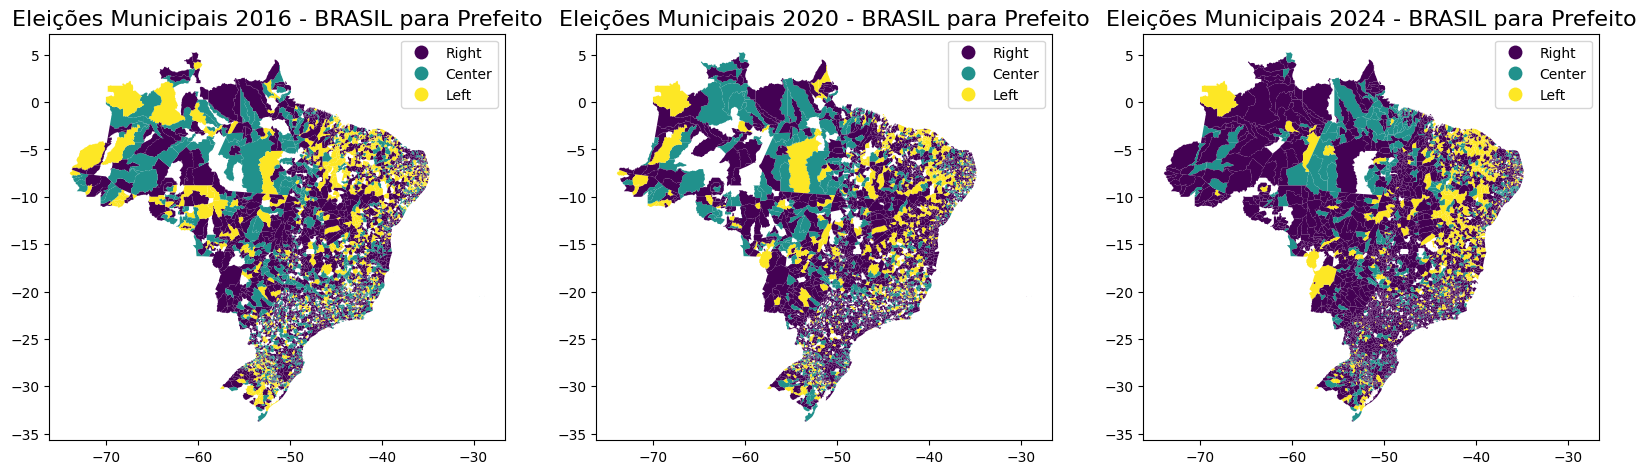

In [57]:
# Ploting the results

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].set_title(f'Eleições Municipais 2016 - {local} para {cargo}', color='black', fontsize=16)
ax[1].set_title(f'Eleições Municipais 2020 - {local} para {cargo}', color='black', fontsize=16)
ax[2].set_title(f'Eleições Municipais 2024 - {local} para {cargo}', color='black', fontsize=16)

espectro_ibge_venc_2016_map.plot(column='Espectro', cmap='viridis', legend=True, ax=ax[0])
espectro_ibge_venc_2020_map.plot(column='Espectro', cmap='viridis', legend=True, ax=ax[1])
espectro_ibge_venc_2024_map.plot(column='Espectro', cmap='viridis', legend=True, ax=ax[2])